# Apply 3  different CNN's on the MNIST dataset

# Assinment 13  (Deep learning Section)

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#Refer this link for making better CNN networks
#https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architectures-part-ii-hyper-parameter-42efca01e5d7



from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


batch_size = 128
num_classes = 10
epochs = 12
# Preparing trainining and testing data


# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)


if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4 
# https://stackoverflow.com/a/14434334 # this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()


#**Model 1->     2 conv + 2  maxpoll+ 3 dense layers**

---

In [3]:

# In this (First Model) lets follow the general structure of the lenet    we will make a simple model

# Network Architecture
#   input -> conv -> polling -> conv -> polling -> FC -> FC -> output
#             8                  16               120    84     10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this  fit function
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dens

In [0]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 31s 522us/step - loss: 0.2797 - acc: 0.9168 - val_loss: 0.1090 - val_acc: 0.9637
Epoch 2/12
60000/60000 [==============================] - 29s 490us/step - loss: 0.0819 - acc: 0.9746 - val_loss: 0.0541 - val_acc: 0.9822
Epoch 3/12
60000/60000 [==============================] - 29s 491us/step - loss: 0.0592 - acc: 0.9823 - val_loss: 0.0447 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 29s 491us/step - loss: 0.0446 - acc: 0.9863 - val_loss: 0.0514 - val_acc: 0.9839
Epoch 5/12
60000/60000 [==============================] - 29s 492us/step - loss: 0.0367 - acc: 0.9890 - val_loss: 0.0388 - val_acc: 0.9883
Epoch 6/12
60000/60000 [==============================] - 30s 492us/step - loss: 0.0308 - acc: 0.9899 - val_loss: 0.0390 - val_acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 30s 493us/step - loss: 0.0273 - acc: 0.9912 - val_loss: 0.

Train score: 0.00919716933188926
Train accuracy: 99.705

************************ *********************

Test score: 0.03759965847136919
Test accuracy: 98.95


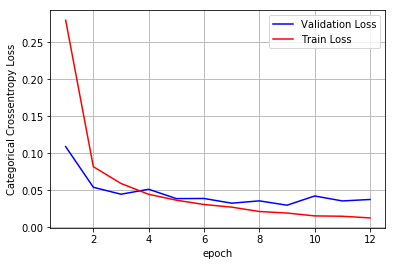

In [0]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)

# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1)) 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#**Model 2->     3 conv + 3  maxpoll+ 2 dense layers**

---

In [0]:
# go basic model to deep layer model

# Network Architecture
#   input -> conv -> polling -> conv -> polling -> conv -> polling ->  FC -> output
#             8                  32               128                   64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this  fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 128)               0         
__________

In [0]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3120 - acc: 0.9073 - val_loss: 0.1023 - val_acc: 0.9693
Epoch 2/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0901 - acc: 0.9728 - val_loss: 0.0724 - val_acc: 0.9776
Epoch 3/12
60000/60000 [==============================] - 64s 1ms/step - loss: 0.0620 - acc: 0.9808 - val_loss: 0.0543 - val_acc: 0.9849
Epoch 4/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0497 - acc: 0.9845 - val_loss: 0.0478 - val_acc: 0.9842
Epoch 5/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0406 - acc: 0.9874 - val_loss: 0.0531 - val_acc: 0.9842
Epoch 6/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0339 - acc: 0.9896 - val_loss: 0.0439 - val_acc: 0.9868
Epoch 7/12
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0295 - acc: 0.9907 - val_loss: 0.0501 - val_acc

Train score: 0.006611525248750877
Train accuracy: 99.815

************************ *********************

Test score: 0.042901084853400426
Test accuracy: 98.98


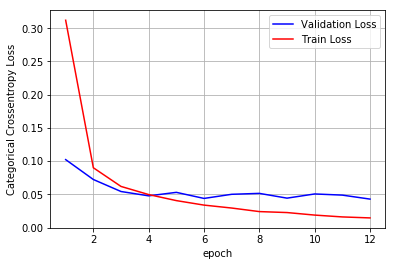

In [0]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)


# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1)) 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Finally we also train a vgg like model with the trend Conv-Conv-Pool-Conv-Conv-Pool**

#**Model 3 -> 4 conv+ 2 maxpoll + 2 dence**


---



In [0]:
# go basic model to deep layer model

# Network Architecture
#   input -> conv -> conv ->  polling -> conv -> conv ->  polling ->  FC -> output
#             16      16                   32     32                 512           

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this  fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
__________

In [0]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 100s 2ms/step - loss: 0.1714 - acc: 0.9478 - val_loss: 0.0400 - val_acc: 0.9876
Epoch 2/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0471 - acc: 0.9851 - val_loss: 0.0358 - val_acc: 0.9892
Epoch 3/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0298 - acc: 0.9908 - val_loss: 0.0254 - val_acc: 0.9914
Epoch 4/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0213 - acc: 0.9934 - val_loss: 0.0289 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0177 - acc: 0.9941 - val_loss: 0.0344 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0151 - acc: 0.9950 - val_loss: 0.0302 - val_acc: 0.9901
Epoch 7/12
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0120 - acc: 0.9958 - val_loss: 0.0331 - val_ac

Train score: 0.005588248573328292
Train accuracy: 99.81833333333333

************************ *********************

Test score: 0.03328722507418738
Test accuracy: 99.21


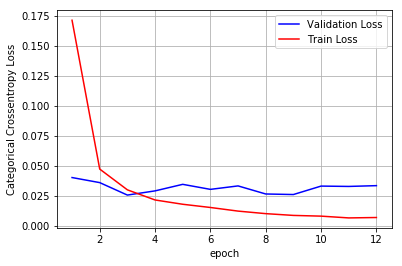

In [0]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)


# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1)) 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Same models with Dropouts, i want to see the effect 

**Model 1->     2 conv + 2  maxpoll+ 3 dense layer +Dropout**

---


In [4]:

# In this (First Model) lets follow the general structure of the lenet    we will make a simple model

# Network Architecture
#   input -> conv -> polling -> conv -> polling ->droupout-> FC -> FC -> output
#             8                  16               120    84     10
model = Sequential()
model.add(Conv2D(8, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this  fit function
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        3216      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
___________________________

In [5]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 134us/step - loss: 0.4000 - acc: 0.8737 - val_loss: 0.0844 - val_acc: 0.9739
Epoch 2/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.1352 - acc: 0.9576 - val_loss: 0.0550 - val_acc: 0.9815
Epoch 3/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.1029 - acc: 0.9675 - val_loss: 0.0429 - val_acc: 0.9875
Epoch 4/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0857 - acc: 0.9729 - val_loss: 0.0424 - val_acc: 0.9858
Epoch 5/12
60000/60000 [==============================] - 2s 38us/step - loss: 0.0779 - acc: 0.9757 - val_loss: 0.0338 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 2s 39us/step - loss: 0.0721 - acc: 0.9775 - val_loss: 0.0338 - val_acc: 0.9887
Epoch 7/12
60000/60000 [==============================] - 2s 41us/step - loss: 

Train score: 0.01824285580939807
Train accuracy: 99.42999999999999

************************ *********************

Test score: 0.02720839965075138
Test accuracy: 99.08


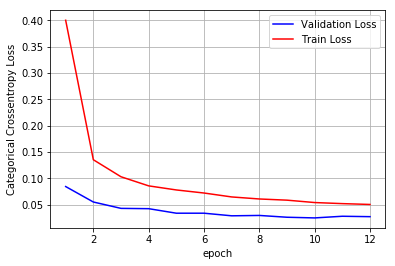

In [6]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)





# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1)) 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Model 2->     3 conv + 3  maxpoll+ 2 dense layers + Dropout**

---

In [7]:
# go basic model to deep layer model

# Network Architecture
#   input -> conv -> polling -> conv -> polling -> conv -> polling ->dropout->  FC -> output
#             8                  32               128                   64
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Dropout(0.9))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this  fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 128)         0         
__________

In [8]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 58us/step - loss: 1.3762 - acc: 0.4850 - val_loss: 0.3159 - val_acc: 0.9382
Epoch 2/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.8758 - acc: 0.6665 - val_loss: 0.2060 - val_acc: 0.9602
Epoch 3/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.7378 - acc: 0.7234 - val_loss: 0.1454 - val_acc: 0.9671
Epoch 4/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.6494 - acc: 0.7607 - val_loss: 0.1163 - val_acc: 0.9691
Epoch 5/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.5928 - acc: 0.7838 - val_loss: 0.1091 - val_acc: 0.9707
Epoch 6/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.5455 - acc: 0.8014 - val_loss: 0.1014 - val_acc: 0.9726
Epoch 7/12
60000/60000 [==============================] - 3s 47us/step - loss: 0.5166 - acc: 0.8150 - val_loss: 0.0872 - val_acc

Train score: 0.07137520205164329
Train accuracy: 98.09

************************ *********************

Test score: 0.07615174515843391
Test accuracy: 97.92999999999999


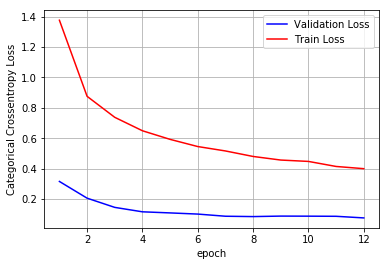

In [9]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)


# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1)) 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

**Model 3->     4 conv + 2  maxpoll+ 2 dense layers + Dropout**

---

In [10]:
# go basic model to deep layer model

# Network Architecture
#   input -> conv -> conv ->  polling -> conv -> conv ->  polling ->dropout->  FC -> output
#             16      16                   32     32                 512           

model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(16,(3, 3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this  fit function
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 5, 5, 32)          0         
__________

In [11]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 64us/step - loss: 0.2060 - acc: 0.9369 - val_loss: 0.0513 - val_acc: 0.9816
Epoch 2/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.0622 - acc: 0.9807 - val_loss: 0.0345 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0311 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0346 - acc: 0.9895 - val_loss: 0.0211 - val_acc: 0.9918
Epoch 5/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0287 - acc: 0.9912 - val_loss: 0.0235 - val_acc: 0.9926
Epoch 6/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0256 - acc: 0.9916 - val_loss: 0.0211 - val_acc: 0.9924
Epoch 7/12
60000/60000 [==============================] - 3s 51us/step - loss: 0.0216 - acc: 0.9930 - val_loss: 0.0261 - val_acc

Train score: 0.003999881712113999
Train accuracy: 99.87333333333333

************************ *********************

Test score: 0.02418117125566155
Test accuracy: 99.37


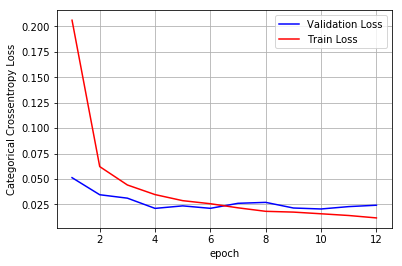

In [12]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)

# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1)) 
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Compare the  model results

In [15]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("conv_layers", "MAxPoll_layers", "Dense_layers","Dropout","Accuracy")
tb.add_row(["2", "2","2","NO",98.95])
tb.add_row(["3", "3","1","NO",98.98])
tb.add_row(["4", "2","1","NO",99.21])


tb.add_row(["2", "2","2","0.5",99.08])
tb.add_row(["3", "3","1","0.9",97.92])
tb.add_row(["4", "2","1","0.3",99.37])
print(tb.get_string(titles = "CNN Models - Observations"))

+-------------+----------------+--------------+---------+----------+
| conv_layers | MAxPoll_layers | Dense_layers | Dropout | Accuracy |
+-------------+----------------+--------------+---------+----------+
|      2      |       2        |      2       |    NO   |  98.95   |
|      3      |       3        |      1       |    NO   |  98.98   |
|      4      |       2        |      1       |    NO   |  99.21   |
|      2      |       2        |      2       |   0.5   |  99.08   |
|      3      |       3        |      1       |   0.9   |  97.92   |
|      4      |       2        |      1       |   0.3   |  99.37   |
+-------------+----------------+--------------+---------+----------+
